In [4]:
pip install yfinance pandas matplotlib arch


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.3/985.3 kB 10.2 MB/s eta 0:00:00


In [5]:
import yfinance as yf
import matplotlib.pyplot as plt
from arch import arch_model
import pandas as pd

In [22]:
# Function to fetch data, calculate returns, and apply GARCH(1,1)
def analyze_index(name, ticker):

    # Download data
    df = yf.download(ticker, start=start_date, end=end_date)

    # Calculate log returns
    df['Log_Return'] = df['Close'].pct_change()

    # Drop missing values
    df.dropna(inplace=True)

    # Plot return series
    plt.figure(figsize=(10, 3))
    plt.plot(df.index, df['Log_Return'], label=f'{name} Log Returns')
    plt.title(f'{name} Daily Log Returns')
    plt.grid(True)
    plt.legend()
    plt.show()

    # Fit GARCH(1,1) model
    model = arch_model(df['Log_Return'] * 100, vol='Garch', p=1, q=1)
    res = model.fit(disp='off')
    print(res.summary())

    # Calculate GARCH conditional volatility
    garch_vol = res.conditional_volatility

    # Calculate realized volatility ( 21-day rolling std dev of returns * 100 to match scale)
    realized_vol = df['Log_Return'].rolling(window=21).std() * 100

    # Combine into a DataFrame
    vol_df = pd.DataFrame({
        'GARCH Volatility': garch_vol,
        'Realized Volatility': realized_vol
    }, index=df.index[-len(garch_vol):])  # align with GARCH output

    # Plot both volatilities
    plt.figure(figsize=(12, 4))
    plt.plot(vol_df.index, vol_df['GARCH Volatility'], label='GARCH(1,1) Estimated Volatility')
    plt.plot(vol_df.index, vol_df['Realized Volatility'], label='Realized Volatility (21-day)', alpha=0.7)
    plt.title(f'{name} - GARCH vs Realized Volatility')
    plt.xlabel('Date')
    plt.ylabel('Volatility (%)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

[*********************100%***********************]  1 of 1 completed


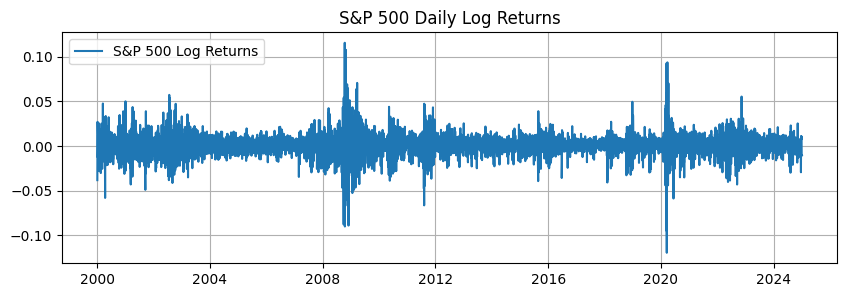

                     Constant Mean - GARCH Model Results                      
Dep. Variable:             Log_Return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -8647.90
Distribution:                  Normal   AIC:                           17303.8
Method:            Maximum Likelihood   BIC:                           17330.8
                                        No. Observations:                 6287
Date:                Mon, Apr 28 2025   Df Residuals:                     6286
Time:                        21:21:52   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0655  1.025e-02      6.389  1.673e-10 [4.

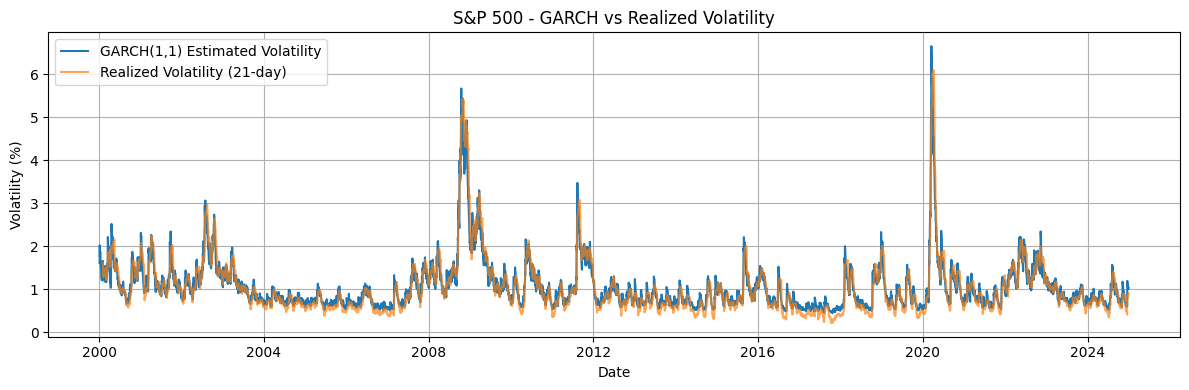

[*********************100%***********************]  1 of 1 completed


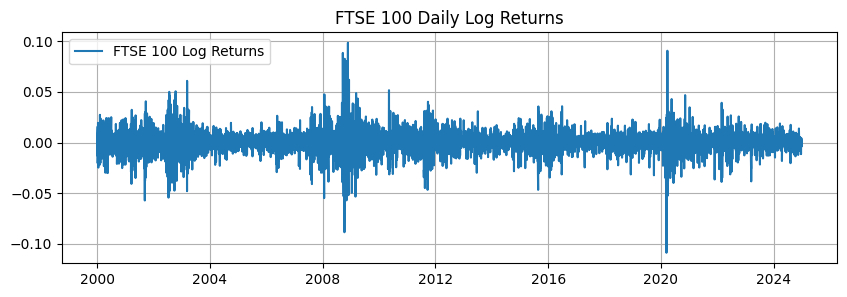

                     Constant Mean - GARCH Model Results                      
Dep. Variable:             Log_Return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -8523.34
Distribution:                  Normal   AIC:                           17054.7
Method:            Maximum Likelihood   BIC:                           17081.7
                                        No. Observations:                 6312
Date:                Mon, Apr 28 2025   Df Residuals:                     6311
Time:                        21:21:53   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0352  1.022e-02      3.443  5.744e-04 [1.

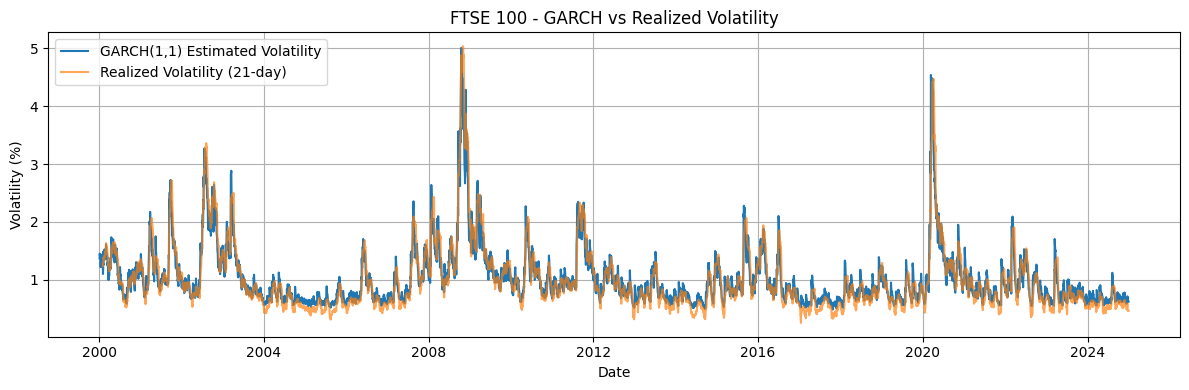

[*********************100%***********************]  1 of 1 completed


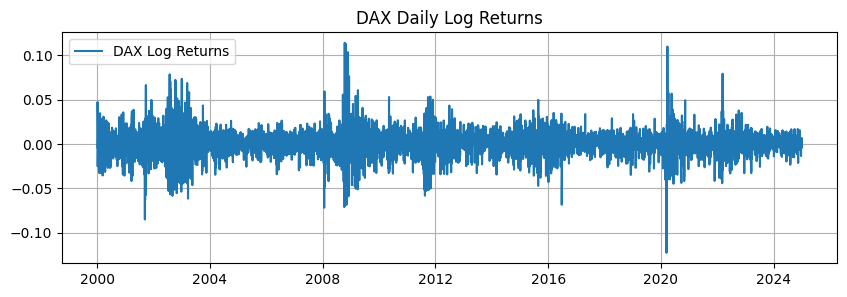

                     Constant Mean - GARCH Model Results                      
Dep. Variable:             Log_Return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -10085.4
Distribution:                  Normal   AIC:                           20178.7
Method:            Maximum Likelihood   BIC:                           20205.8
                                        No. Observations:                 6347
Date:                Mon, Apr 28 2025   Df Residuals:                     6346
Time:                        21:21:54   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0715  1.346e-02      5.312  1.083e-07 [4.

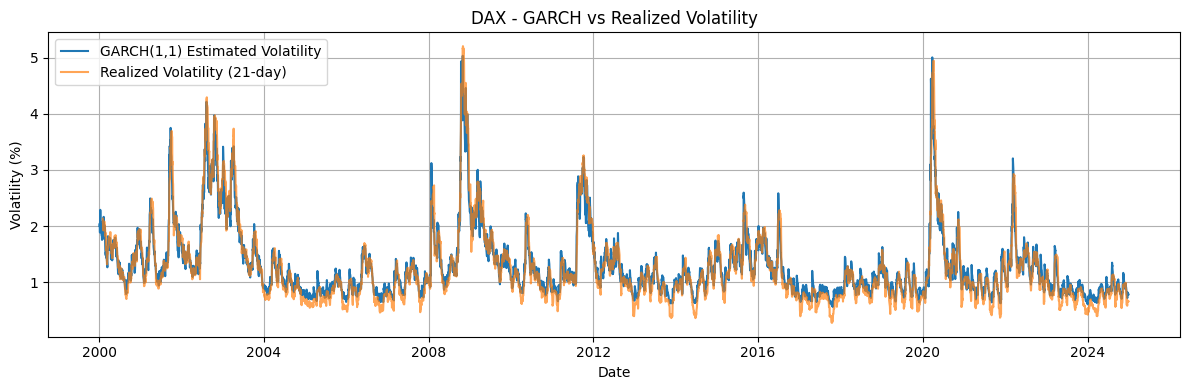

[*********************100%***********************]  1 of 1 completed


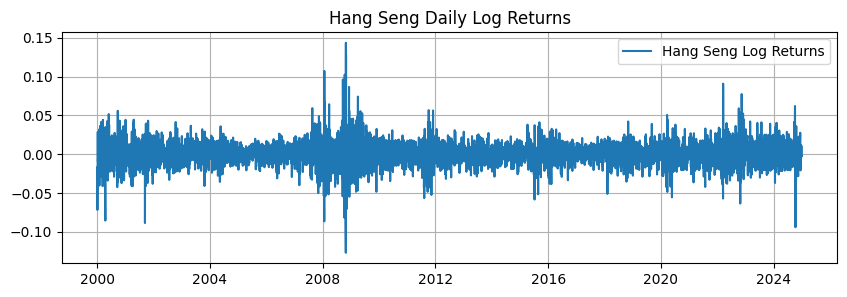

                     Constant Mean - GARCH Model Results                      
Dep. Variable:             Log_Return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -10233.1
Distribution:                  Normal   AIC:                           20474.1
Method:            Maximum Likelihood   BIC:                           20501.0
                                        No. Observations:                 6158
Date:                Mon, Apr 28 2025   Df Residuals:                     6157
Time:                        21:21:54   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0443  1.478e-02      2.997  2.727e-03 [1.

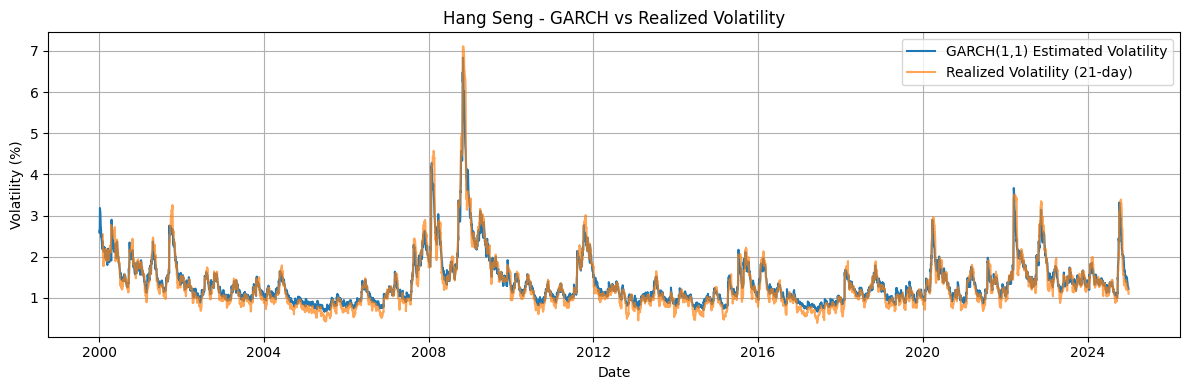

[*********************100%***********************]  1 of 1 completed


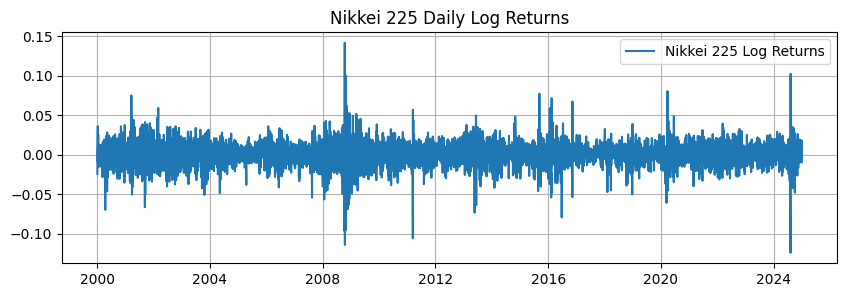

                     Constant Mean - GARCH Model Results                      
Dep. Variable:             Log_Return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -10237.1
Distribution:                  Normal   AIC:                           20482.3
Method:            Maximum Likelihood   BIC:                           20509.2
                                        No. Observations:                 6125
Date:                Mon, Apr 28 2025   Df Residuals:                     6124
Time:                        21:21:55   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0637  1.483e-02      4.294  1.756e-05 [3.

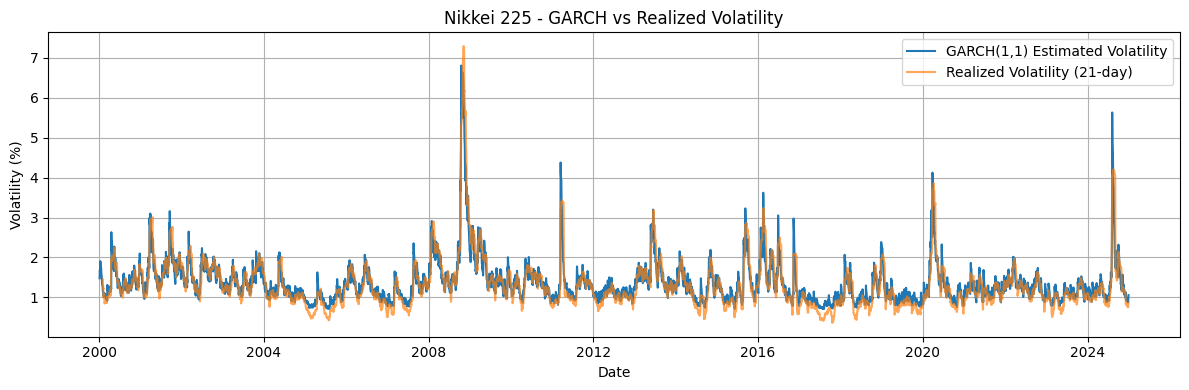

[*********************100%***********************]  1 of 1 completed


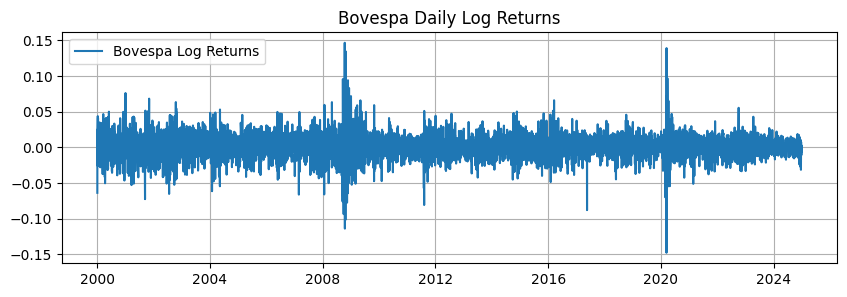

                     Constant Mean - GARCH Model Results                      
Dep. Variable:             Log_Return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -11390.8
Distribution:                  Normal   AIC:                           22789.6
Method:            Maximum Likelihood   BIC:                           22816.6
                                        No. Observations:                 6190
Date:                Mon, Apr 28 2025   Df Residuals:                     6189
Time:                        21:21:56   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0649  1.789e-02      3.627  2.866e-04 [2.

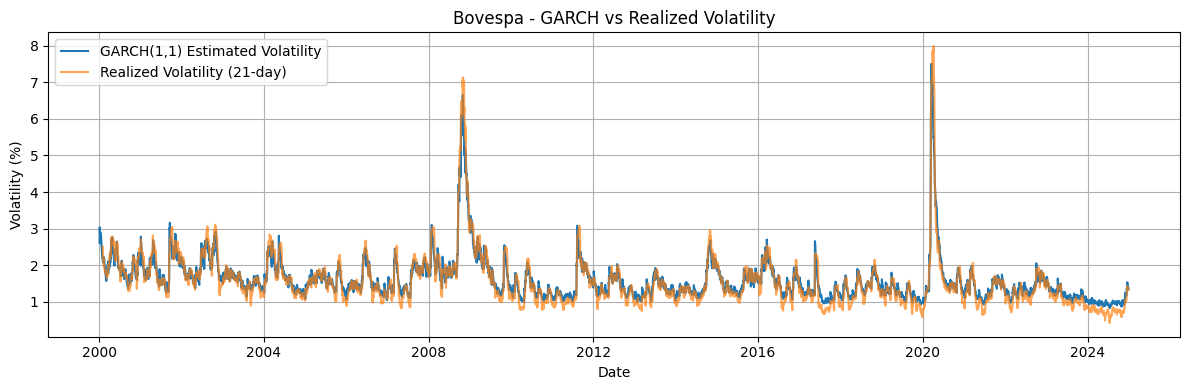

In [23]:
indices = {
    "S&P 500": "^GSPC",
    "FTSE 100": "^FTSE",
    "DAX": "^GDAXI",
    "Hang Seng": "^HSI",
    "Nikkei 225": "^N225",
    "Bovespa": "^BVSP"
}
start_date = "2000-01-01"
end_date = "2024-12-31"
# Loop through all indices
for name, ticker in indices.items():
    analyze_index(name, ticker)